In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
from easyocr import Reader
import cv2
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import time

In [4]:
# 이미지 확인
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()

In [34]:
def make_scan_image(image, width, ksize=(5,5), min_threshold=75, max_threshold=200):
  image_list_title = []
  image_list = []
 
  # image = imutils.resize(image, width=width)
  # ratio = org_image.shape[1] / float(image.shape[1])
 
  # 이미지를 grayscale로 변환하고 blur를 적용 => edged 추출
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  grayscale = cv2.threshold(gray, 255, 255, cv2.THRESH_OTSU)[1]
  # blurred = cv2.GaussianBlur(gray, ksize, 0)
  # edged = cv2.Canny(grayscale, min_threshold, max_threshold)
 
  # 이미지 선명도
  kernel = np.array([
    [0,-1, 0],
    [-1, 10, -1],
    [0,-1, 0]
  ])
  
  filter = cv2.filter2D(grayscale,-1,kernel)
  blurred = cv2.GaussianBlur(grayscale, ksize, 0)
  # edged = cv2.Canny(filter, min_threshold, max_threshold)
 
 
  image_list_title = ['org_image','gray','grayscale','blurred', 'filter']
  image_list = [image, gray, grayscale,blurred, filter]
 
  plt_imshow(image_list_title, image_list)
  return image_list

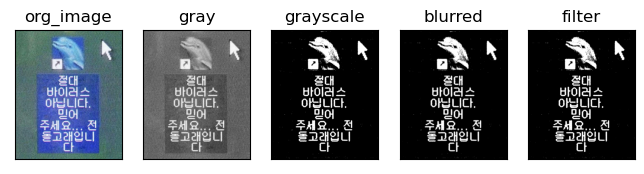

In [35]:
# load image
url = 'https://i.pinimg.com/originals/71/41/9f/71419f7932e091bf543952128f212348.jpg'
# url = "https://i.pinimg.com/originals/6f/20/a2/6f20a236a9f5ee4865947309e6adb373.jpg"
# url = "https://i.pinimg.com/originals/56/3b/2b/563b2bacab737f8b9b4b4a9b442f2ae8.jpg"

 
image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
# plt_imshow("orignal image", org_image)
 
business_card_image = make_scan_image(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100)

In [36]:
langs = ['ko']

reader = Reader(lang_list=langs)


for i in business_card_image:
    simple_results = reader.readtext(i, detail = 0)
    print(simple_results)

# simple_results = reader.readtext(business_card_image, detail = 0)
# simple_results

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['절대', '바이러스', '아니니다.', '믿어', '주세요', '전', '돌고래입다', '다']
['절대', '바이러스', '아니니다.', '믿어', '주세요', '전', '돌고래입다', '다']
['절대', '바이러스', '아니니다', '믿어', '주서요_', '전', '돌고래입다', '다']
['절대', '바이러스', '아니니다', '믿어', '주서요', '전', '돌고래입다', '다']
['절대', '바이러스', '아니니다', '믿어', '주서요_', '전', '돌고래입다', '다']


In [29]:
langs = ['ko', 'en']

reader = Reader(lang_list=langs)


for i in business_card_image:
    simple_results = reader.readtext(i, detail = 0)
    print(simple_results)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['절대', '바이러스', '아니니다.', '믿어', '주세요', '전', '돌고래입다', '다']
['절대', '바이러스', '아니니다.', '믿어', '주세요', '전', '돌고래입다', '다']
['절대', '바이러스', '아니니다', '믿어', '주서요_', '전', '돌고래입다', '다']
['절대', '바이러스', '아니니다', '믿어', '주서요', '전', '돌고래입다', '다']
['소C', '@이러', '@:GCICI', '@O', '중요', '올교래합[', 'CI']
